CNN classification using the sign mnist dataset with image data augmentation

## Load dependent libraries

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
tf.__version__

'2.4.1'

## Preprocess data

In [23]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')
        temp_images = []
        temp_labels = []
        next(reader)
        for row in reader:
            temp_labels.append(row[0])
            image_data = row[1:785]
            image_data_as_array = np.array_split(image_data, 28)
            temp_images.append(image_data_as_array)                
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('../data/sign_mnist_train.csv')
testing_images, testing_labels = get_data('../data/sign_mnist_test.csv')

## Some info about the dataset

In [17]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

num_classes = None
num_classes = len(np.unique(training_labels))
print(np.unique(training_labels))
print(num_classes)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]
24


## Take a look the images

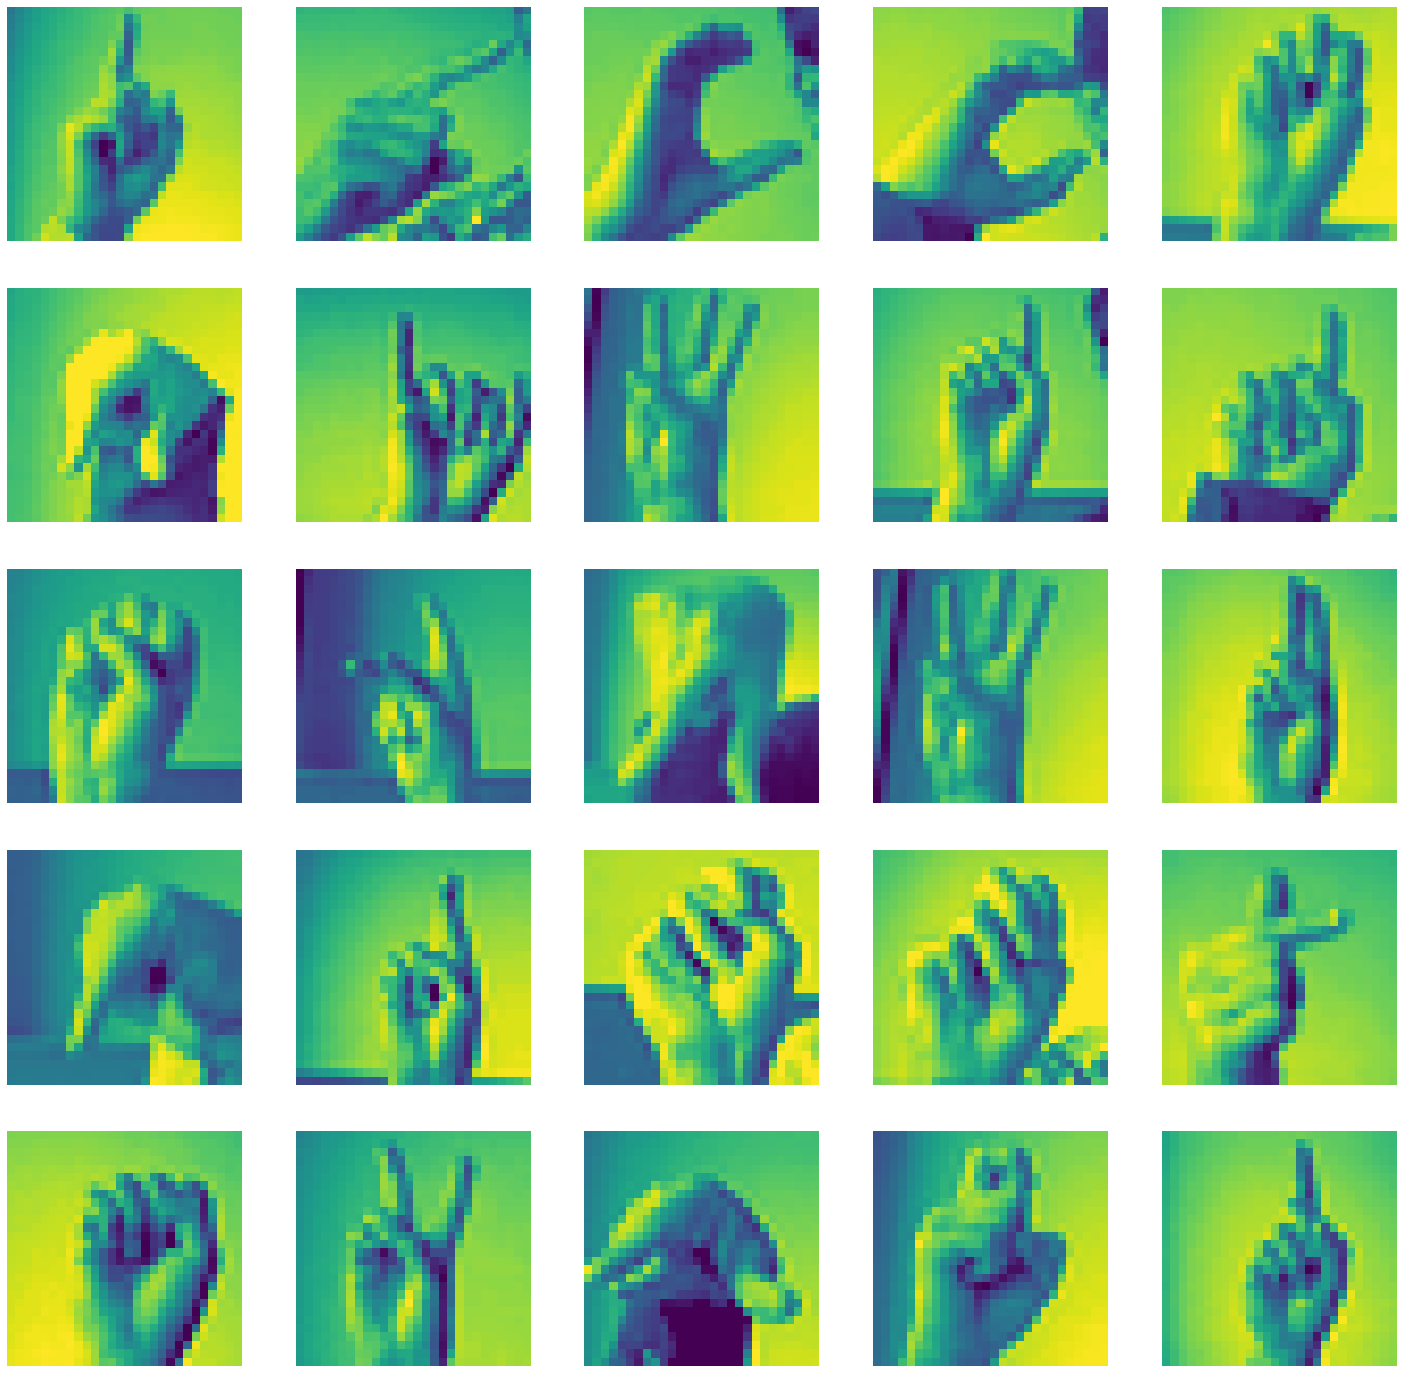

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 5x5 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 5x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

i = 0
for img in training_images[0:25]:
    sp = plt.subplot(nrows, ncols, i + 1)
    i += 1
    sp.axis('Off')
    #img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Initialize ImageDataGenerator for training

In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


## Build Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3

## Fit Model

In [6]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32))
                    
model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/858 [==============================] - 10s 9ms/step - loss: 3.0777 - accuracy: 0.0820 - val_loss: 2.0438 - val_accuracy: 0.3487
Epoch 2/15
858/858 [==============================] - 7s 8ms/step - loss: 2.2377 - accuracy: 0.2965 - val_loss: 1.3136 - val_accuracy: 0.5680
Epoch 3/15
858/858 [==============================] - 7s 8ms/step - loss: 1.7941 - accuracy: 0.4230 - val_loss: 1.2362 - val_accuracy: 0.5517
Epoch 4/15
858/858 [==============================] - 7s 8ms/step - loss: 1.5382 - accuracy: 0.5015 - val_loss: 1.0634 - val_accuracy: 0.6401
Epoch 5/15
858/858 [==============================] - 7s 8ms/step - loss: 1.3858 - accuracy: 0.5449 - val_loss: 0.9895 - val_accuracy: 0.6548
Epoch 6/15
858/858 [==============================] - 7s 8ms/step - loss: 1.2496 - accuracy: 0.5878 - val_loss: 0.8896 - val_accuracy: 0.6721
Epoch 7/15
858/858 [==============================] - 7s 8ms/step - loss: 1.1564 - accuracy: 0.6155 - val_loss: 0.8099 - val_accuracy: 0.7179
Epoch

[644.5135498046875, 0.400306761264801]

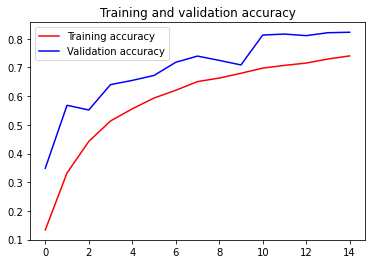

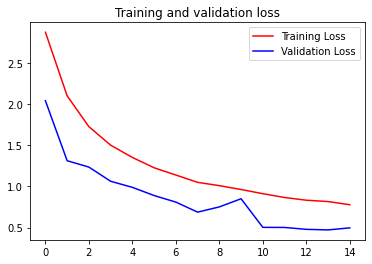

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()